In [ ]:
!pip install tensorflow

**IMPORT LIBRARIES**


In [ ]:
import tensorflow as tf


**LOADING MNIST DATASET**

In [ ]:
mnist=tf.keras.datasets.mnist

**UNPACKING DATASET INTO TRAIN AND TEST DATASETS**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("train dataset:",x_train.shape)
print("test dataset:",x_test.shape)

train dataset: (60000, 28, 28)
test dataset: (10000, 28, 28)


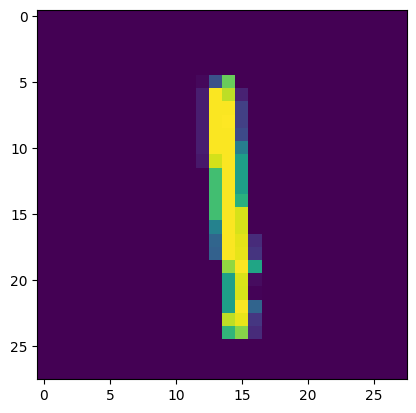

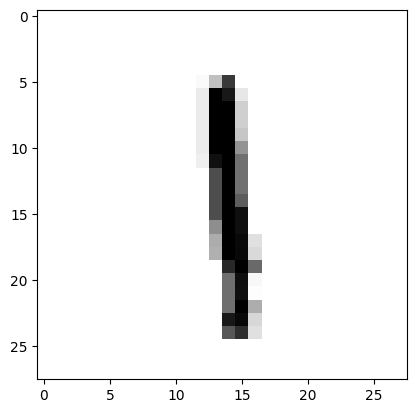

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8])
plt.show()
plt.imshow(x_train[8],cmap=plt.cm.binary)

**CHECKING THE VALUE OF EACH PIXEL BEFORE NORMALIZATION**

In [ ]:
print((x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  4

**AS IMAGES ARE IN GREY LEVEL(1 CHANNEL==>0 TO 255), NOT COLOURED(RGB)**
**Normalizing the data|pre-processing step**

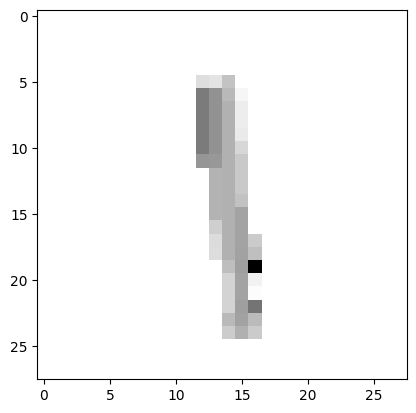

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[8],cmap=plt.cm.binary)

In [ ]:
print(x_train[8]) #normalized value

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[8]) #verifying the lables

1


**RESIZEING IMAGE TO MAKE IT SUITABLE FOR APPLY CONVOLUTION OPERATION**

In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernal operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernal operation
print("Training sample dimension",x_trainr.shape)
print("Testing sample dimension",x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


**CREATING DEEP NEURAL NETWORK**



TRAINING ON 60000 SAMPLES OF MNIST HANDWRITTEN DATASET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
#Creating neural network
model=Sequential()

#First convolution Layer 0 1 2 3 (60000,28,28,1)
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:])) #only for first convolution layer to mention input layer size.
model.add(Activation("relu")) #activation function to make it non-linear <0,remove>0
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of 2X2

model.add(Conv2D(64,(3,3))) #2nd convolution Layer
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling

model.add(Conv2D(64,(3,3))) #3rd convolution Layer
model.add(Activation("relu")) #activation function

#Fully Conected Layer #1 20x20=400
model.add(Flatten()) #before using fully conected layer need, to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Conected Layer #2 20x20=400
model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Conected Layer, output must be equal to number of class, 10 (0-9)
model.add(Dense(10)) #this last dense layer must be equal to 10
model.add(Activation("softmax")) #activation function is changed to softmax(class probabilities)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [ ]:
print("total training samples=",len(x_trainr))

total training samples= 60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=25,validation_split=0.3) #train the model

Epoch 1/25
1313/1313 [==============================] - 16s 11ms/step - loss: 0.2463 - accuracy: 0.9215 - val_loss: 0.1064 - val_accuracy: 0.9680
Epoch 2/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0695 - accuracy: 0.9788 - val_loss: 0.0624 - val_accuracy: 0.9816
Epoch 3/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0574 - val_accuracy: 0.9841
Epoch 4/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0581 - val_accuracy: 0.9833
Epoch 5/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 6/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0466 - val_accuracy: 0.9874
Epoch 7/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0444 -

In [ ]:
#Evaulating on testing dataset
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10,000 samples",test_loss)
print("Validation accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9894
test loss on 10,000 samples 0.0633358284831047
Validation accuracy on 10,000 test samples 0.9894000291824341


In [ ]:
predictions=model.predict([x_testr])

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(predictions)

[[4.0908076e-12 4.3732415e-10 2.5320376e-10 ... 9.9999994e-01
  6.4669494e-12 2.1349351e-11]
 [2.9549359e-11 5.5454592e-09 9.9999994e-01 ... 1.5299305e-11
  5.8706707e-13 1.3598117e-15]
 [1.8294646e-14 9.9999994e-01 9.7585687e-13 ... 2.5031824e-14
  5.4837900e-13 7.0744246e-14]
 ...
 [2.6294719e-12 1.0564730e-10 9.3517538e-10 ... 3.4607528e-10
  7.0845635e-11 3.1251921e-11]
 [1.6985680e-14 4.9016314e-13 3.0961829e-20 ... 1.8922635e-18
  8.4992462e-13 7.4544704e-11]
 [2.2788978e-08 3.0466078e-11 7.0776141e-09 ... 8.5868016e-15
  2.4011081e-08 9.8634066e-11]]


5


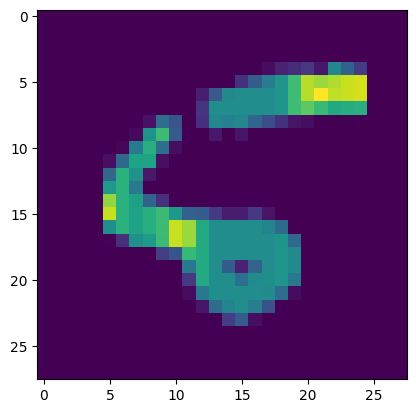

In [ ]:
print(np.argmax(predictions[8]))
plt.imshow(x_test[8])

4


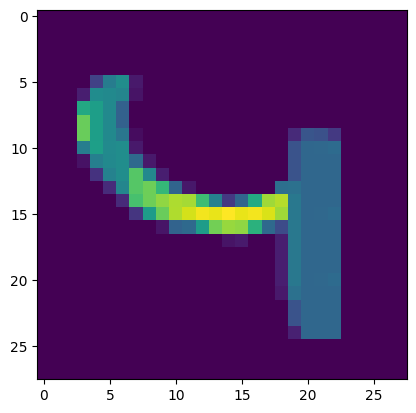

In [ ]:
print(np.argmax(predictions[360]))
plt.imshow(x_test[360])

2


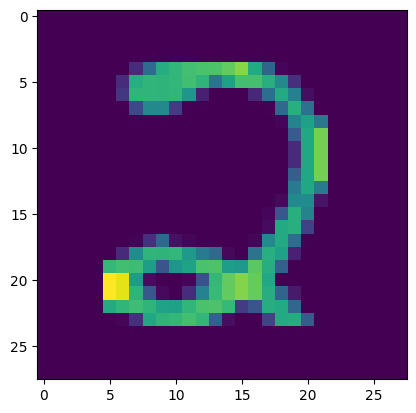

In [ ]:
print(np.argmax(predictions[72]))
plt.imshow(x_test[72])

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/NN_DATA_MODEL/DIGIT_CLASSIFICATION.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving Untitled.png to Untitled (2).png


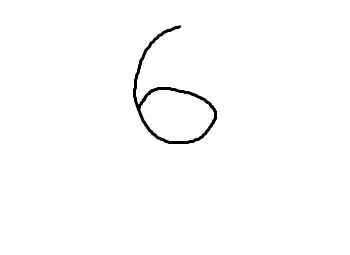

1/1 [==============================] - 0s 84ms/step
Predicted Digit: 6
Confidence: 0.64126647


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image,display

# Load a pre-trained digit classification model (assuming you have one)
model = keras.models.load_model("/content/drive/MyDrive/NN_DATA_MODEL/DIGIT_CLASSIFICATION.h5")

# Function to predict the numerical value in an image
def predict_digit(image_path, true_label=None):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize the image to match the MNIST dataset
    img = img / 255.0  # Normalize the pixel values to be between 0 and 1
    img = img.reshape(1, 28, 28)  # Reshape to match the model's input shape

    # Make the prediction
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)  # Confidence corresponds to the highest predicted probability

    # Calculate accuracy
    accuracy = None
    if true_label is not None:
        accuracy = 1 if true_label == predicted_digit else 0

    return predicted_digit, confidence, accuracy

# Allow the user to upload an image
uploaded = files.upload()

# Display the uploaded image
image_path = list(uploaded.keys())[0]
display(Image(image_path))

# True label of the uploaded image (if available)
true_label = None  # Replace None with the true label if known

# Predict the digit in the uploaded image
predicted_digit, confidence, accuracy = predict_digit(image_path, true_label)
print("Predicted Digit: 6", predicted_digit)
print("Confidence:", confidence)
if accuracy is not None:
    print("Accuracy:", accuracy)
